In [1]:
import requests
import io
import pandas as pd
%matplotlib inline

In [2]:
url_1 = 'http://visual.ons.gov.uk/wp-content/uploads/2017/09/Top-10-data-download.xlsx'

In [3]:
r = requests.get(url_1)
df = pd.read_excel(io.BytesIO(r.content), sheetname='Males', skiprows=3, skip_footer=(395-185), header=None)

In [4]:
df.iloc[0] = df.iloc[0].str.slice(0,-1).ffill()
df.iloc[:2, 0] = 'Age'
df.iloc[:, 0] = df.iloc[:, 0].ffill()
df.columns = pd.MultiIndex.from_arrays(df.iloc[:2].values)
df.set_index(df['Age']['Age'], inplace=True)
df = df.drop('Age').drop('Age', axis=1, level=0).dropna(how='all')

In [5]:
df.columns

MultiIndex(levels=[['1915', '1925', '1935', '1945', '1955', '1965', '1975', '1985', '1995', '2005', '2015', 'Age'], ['Age', 'ICD-10 code', 'ICD-2 code', 'ICD-3 code', 'ICD-4 code', 'ICD-5 code', 'ICD-6 code', 'ICD-7 code', 'ICD-8 code', 'ICD-9 code', 'Percentage (%)5', 'Rank', 'Total (N)', 'Underlying cause4']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10], [11, 2, 13, 12, 10, 11, 3, 13, 12, 10, 11, 4, 13, 12, 10, 11, 5, 13, 12, 10, 11, 6, 13, 12, 10, 11, 7, 13, 12, 10, 11, 8, 13, 12, 10, 11, 9, 13, 12, 10, 11, 9, 13, 12, 10, 11, 1, 13, 12, 10, 11, 1, 13, 12, 10]])

In [6]:
df.stack(level=0)

ICD-10 code ICD-2 code ICD-3 code ICD-4 code ICD-5 code  \
Age                                                                      
1-4 years 1915         NaN          6        NaN        NaN        NaN   
          1925         NaN        NaN        100        NaN        NaN   
          1935         NaN        NaN        NaN        107        NaN   
          1945         NaN        NaN        NaN        NaN     107(2)   
          1955         NaN        NaN        NaN        NaN        NaN   
          1965         NaN        NaN        NaN        NaN        NaN   
          1975         NaN        NaN        NaN        NaN        NaN   
          1985         NaN        NaN        NaN        NaN        NaN   
          1995         NaN        NaN        NaN        NaN        NaN   
          2005         A39        NaN        NaN        NaN        NaN   
          2015         C71        NaN        NaN        NaN        NaN   
          1915         NaN         91        NaN        NaN        NaN   
          1925         NaN        NaN          7        NaN        NaN   
          1935         NaN        NaN        NaN         10        NaN   
          1945         NaN        NaN        NaN        NaN         14   
          1955         NaN        NaN        NaN        NaN        NaN   
          1965         NaN        NaN        NaN        NaN        NaN   
          1975         NaN        NaN        NaN        NaN        NaN   
          1985         NaN        NaN        NaN        NaN        NaN   
          1995         NaN        NaN        NaN        NaN        NaN   
          2005         C71        NaN        NaN        NaN        NaN   
          2015         J12        NaN        NaN        NaN        NaN   
          1915         NaN     89&90B        NaN        NaN        NaN   
          1925         NaN        NaN          9        NaN        NaN   
          1935         NaN        NaN        NaN          7        NaN   
          1945         NaN        NaN        NaN        NaN       170c   
          1955         NaN        NaN        NaN        NaN        NaN   
          1965         NaN        NaN        NaN        NaN        NaN   
          1975         NaN        NaN        NaN        NaN        NaN   
          1985         NaN        NaN        NaN        NaN        NaN   
...                    ...        ...        ...        ...        ...   
80+ years 1955         NaN        NaN        NaN        NaN        NaN   
          1965         NaN        NaN        NaN        NaN        NaN   
          1975         NaN        NaN        NaN        NaN        NaN   
          1985         NaN        NaN        NaN        NaN        NaN   
          1995         NaN        NaN        NaN        NaN        NaN   
          2005         I67        NaN        NaN        NaN        NaN   
          2015         I64        NaN        NaN        NaN        NaN   
          1915         NaN        64A        NaN        NaN        NaN   
          1925         NaN        NaN      90(9)        NaN        NaN   
          1935         NaN        NaN        NaN       106c        NaN   
          1945         NaN        NaN        NaN        NaN        94a   
          1955         NaN        NaN        NaN        NaN        NaN   
          1965         NaN        NaN        NaN        NaN        NaN   
          1975         NaN        NaN        NaN        NaN        NaN   
          1985         NaN        NaN        NaN        NaN        NaN   
          1995         NaN        NaN        NaN        NaN        NaN   
          2005         F03        NaN        NaN        NaN        NaN   
          2015         F01        NaN        NaN        NaN        NaN   
          1915         NaN       120A        NaN        NaN        NaN   
          1925         NaN        NaN     91b(1)        NaN        NaN   
          1935         NaN        NaN        NaN        131        NaN   
          1945     

In [7]:
url_2 = 'https://www.ons.gov.uk/visualisations/dvc427/data2.csv'

In [8]:
r = requests.get(url_2)
df = pd.read_csv(io.StringIO(r.text), index_col='date', parse_dates=True)

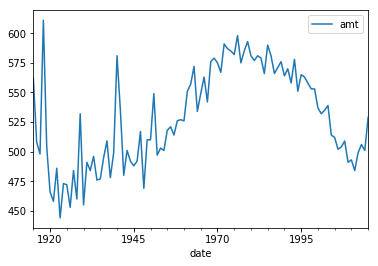

In [9]:
df.sort_index().plot()

In [10]:
url_3 = 'https://www.ons.gov.uk/visualisations/dvc427/data3.csv'

In [11]:
r = requests.get(url_3)
df = pd.read_csv(io.StringIO(r.text), index_col='Age')

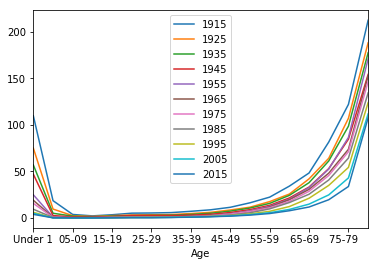

In [12]:
df.plot()